In [1]:
import pandas as pd
import numpy as np

# Data Preparation
## Data Load

In [2]:
df = pd.read_csv("../data/raw/output.csv")

In [3]:
df.shape

(8192, 21)

In [4]:
df

,alt,XM,ZXN_HPC,FN,FG,SFC,FNqW2,WF,WF_total,St2_W,...,St2_Ts,St2_P,St3_W,St3_T,St3_Ts,St3_P,St5_W,St5_T,St5_Ts,St5_P
0,0.00000,0.000000,0.60000,0.560520,0.56052,53.580,184.5700,0.030032,0.030032,3.0368,...,286.25,101.330,3.0368,387.93,384.01,220.66,3.0669,648.78,644.13,110.950
1,3000.00000,0.350000,0.80000,1.034800,1.59090,35.029,214.0100,0.036247,0.036247,4.8352,...,266.42,76.309,4.8352,449.11,443.18,331.42,4.8715,569.97,557.22,98.621
2,4500.00000,0.175000,0.70000,0.573150,0.73756,42.851,196.8200,0.024560,0.024560,2.9121,...,256.05,58.976,2.9121,395.92,391.04,194.63,2.9366,560.39,552.00,70.611
3,1500.00000,0.525000,0.90000,1.892900,3.21010,32.481,252.3600,0.061483,0.061483,7.5007,...,278.87,102.030,7.5007,507.87,501.27,546.25,7.5621,624.85,607.61,145.050
4,2250.00000,0.262500,0.85000,1.640100,2.14250,29.230,284.1300,0.047940,0.047940,5.7724,...,265.24,80.841,5.7724,473.50,467.39,411.05,5.8203,608.86,593.85,116.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,2250.70000,0.635830,0.65063,-0.008334,0.77832,-299.000,-2.2334,0.018340,0.018340,3.7313,...,292.58,101.160,3.7313,400.71,394.80,230.78,3.7497,475.41,469.38,90.549
8188,1500.70000,0.198330,0.70063,0.671970,0.92505,46.791,176.1500,0.031442,0.031442,3.8148,...,276.57,86.900,3.8148,413.93,408.90,260.87,3.8462,592.36,584.52,100.630
8189,4500.70000,0.548330,0.90063,1.583000,2.59090,30.599,277.8200,0.048438,0.048438,5.6977,...,258.17,70.817,5.6977,488.70,482.40,412.18,5.7462,614.82,597.29,107.960
8190,3000.70000,0.023328,0.60063,0.422630,0.44041,55.997,182.1700,0.023666,0.023666,2.3200,...,266.65,70.129,2.3200,369.45,365.62,162.61,2.3437,607.64,602.76,77.675


## Removing Data points with -ve Thrust

In [6]:
print((df[df["FN"]<0]).shape)
data1 = df[df["FN"]<0]
# data1
data1[(data1["FNqW2"]<0)]
removal = list(data1.index)
# len(removal)
data1

(180, 21)


In [7]:
data = df.drop(removal)
data

## Splitting outputs and inputs

In [55]:
X = data[["alt", "XM", "ZXN_HPC"]]
y = data.drop(["alt", "XM", "ZXN_HPC"], axis = 1)
X.columns = ["Altitude", "MachNumber", "HPCSpoolSpeed"]
y.columns = ["NetThrust", "GrossThrust", "SFC", "SpecificThrust", "FuelFlow", "FuelFlowTotal", "CompInletMassFlow", "CompInletTt", "CompInletTs", "CompInletPt", "CompExitMassFlow", "CompExitTt", "CompExitTs", "CompExitPt", "TurbExitMassFlow", "TurbineExitTt", "TurbineExitTs", "TurbineExitPt"]

In [54]:
data.columns[3:]

Index(['FN', 'FG', 'SFC', 'FNqW2', 'WF', 'WF_total', 'St2_W', 'St2_T',
       'St2_Ts', 'St2_P', 'St3_W', 'St3_T', 'St3_Ts', 'St3_P', 'St5_W',
       'St5_T', 'St5_Ts', 'St5_P'],
      dtype='object')

In [10]:
print(X.shape)
X.head()

(8012, 3)


,Altitude,MachNumber,HPCSpoolSpeed
0,0.0,0.0000,0.60
1,3000.0,0.3500,0.80
2,4500.0,0.1750,0.70
3,1500.0,0.5250,0.90
4,2250.0,0.2625,0.85


In [56]:
print(y.shape)
y.describe()

(8012, 18)


,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,FuelFlowTotal,CompInletMassFlow,CompInletTt,CompInletTs,CompInletPt,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt
count,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.000000,8012.00000,8012.000000
mean,1.277993,1.867247,52.263932,232.655241,0.042032,0.042032,4.985283,277.035409,266.197823,79.804396,4.985283,452.048220,446.291706,354.098053,5.027316,594.311639,581.48082,106.388128
std,0.911361,1.104185,48.908055,117.916460,0.019161,0.019161,1.718178,13.824316,15.974262,19.108103,1.718178,48.357405,47.778507,139.264015,1.735872,61.789715,58.15666,29.773234
min,0.000344,0.341030,21.739000,0.111450,0.014010,0.014010,1.740000,249.250000,221.360000,47.262000,1.740000,350.960000,347.230000,117.470000,1.760400,439.740000,433.18000,53.068000
25%,0.491538,0.913722,28.254750,141.107500,0.026482,0.026482,3.600950,266.410000,254.690000,64.148250,3.600950,411.100000,405.727500,239.855000,3.629300,552.207500,542.49500,83.741000
50%,1.081350,1.641450,34.569000,228.375000,0.036886,0.036886,4.836200,276.900000,266.300000,77.841500,4.836200,452.075000,446.155000,335.270000,4.872800,589.010000,577.03000,103.045000
75%,1.962100,2.636450,54.223750,325.837500,0.054514,0.054514,6.153275,286.820000,277.770000,93.797000,6.153275,492.477500,486.077500,447.575000,6.208100,632.922500,617.29250,124.165000
max,4.186200,6.113100,299.000000,538.350000,0.113890,0.113890,10.727000,315.960000,310.760000,139.810000,10.727000,568.300000,561.320000,848.310000,10.841000,741.070000,720.63000,223.800000


In [12]:
max(y["CompInletPt"])

315.96

## Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train, test_size=0.1)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5768, 3) (1603, 3) (5768, 18) (1603, 18)


## Feature-wise Normalization

In [17]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

In [16]:
X_test

,Altitude,MachNumber,HPCSpoolSpeed
2953,4182.10,0.641380,0.93936
5835,2759.00,0.687270,0.99077
1411,1567.40,0.379740,0.73145
341,5988.30,0.354100,0.66172
6384,402.10,0.107070,0.69224
...,...,...,...
952,896.48,0.018457,0.67305
693,5806.60,0.550290,0.73008
2778,5576.70,0.205250,0.64795
2405,5523.90,0.650270,0.72568


# Building Model

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
def build_model():
    norm_layer = layers.Normalization(input_shape=X_train.shape[1:])
    model = keras.Sequential([
        norm_layer,
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(18)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])
    norm_layer.adapt(X_train)
    return model

## Preliminary Model Building & Training

In [75]:
model = build_model()
history = model.fit(X_train, y_train, batch_size=16, epochs=500, 
                    validation_data=(X_vald, y_vald))

Epoch 1/500
361/361 [==============================] - 1s 2ms/step - loss: 11995.9961 - root_mean_squared_error: 109.5263 - val_loss: 1668.7761 - val_root_mean_squared_error: 40.8507
Epoch 2/500
361/361 [==============================] - 1s 1ms/step - loss: 1335.2085 - root_mean_squared_error: 36.5405 - val_loss: 676.2241 - val_root_mean_squared_error: 26.0043
Epoch 3/500
361/361 [==============================] - 1s 1ms/step - loss: 314.2305 - root_mean_squared_error: 17.7266 - val_loss: 189.6789 - val_root_mean_squared_error: 13.7724
Epoch 4/500
361/361 [==============================] - 1s 1ms/step - loss: 160.5481 - root_mean_squared_error: 12.6708 - val_loss: 154.6829 - val_root_mean_squared_error: 12.4372
Epoch 5/500
361/361 [==============================] - 1s 1ms/step - loss: 138.9435 - root_mean_squared_error: 11.7874 - val_loss: 141.1935 - val_root_mean_squared_error: 11.8825
Epoch 6/500
361/361 [==============================] - 1s 1ms/step - loss: 125.2146 - root_mean_squa

Epoch 48/500
361/361 [==============================] - 1s 2ms/step - loss: 2.8850 - root_mean_squared_error: 1.6985 - val_loss: 7.7696 - val_root_mean_squared_error: 2.7874
Epoch 49/500
361/361 [==============================] - 1s 2ms/step - loss: 3.2008 - root_mean_squared_error: 1.7891 - val_loss: 1.6547 - val_root_mean_squared_error: 1.2864
Epoch 50/500
361/361 [==============================] - 1s 2ms/step - loss: 6.9250 - root_mean_squared_error: 2.6315 - val_loss: 1.8550 - val_root_mean_squared_error: 1.3620
Epoch 51/500
361/361 [==============================] - 1s 2ms/step - loss: 2.0848 - root_mean_squared_error: 1.4439 - val_loss: 3.2315 - val_root_mean_squared_error: 1.7976
Epoch 52/500
361/361 [==============================] - 1s 2ms/step - loss: 1.8310 - root_mean_squared_error: 1.3532 - val_loss: 2.0425 - val_root_mean_squared_error: 1.4292
Epoch 53/500
361/361 [==============================] - 1s 2ms/step - loss: 3.0997 - root_mean_squared_error: 1.7606 - val_loss: 1

Epoch 142/500
361/361 [==============================] - 1s 2ms/step - loss: 3.1606 - root_mean_squared_error: 1.7778 - val_loss: 0.5595 - val_root_mean_squared_error: 0.7480
Epoch 143/500
361/361 [==============================] - 1s 2ms/step - loss: 1.3653 - root_mean_squared_error: 1.1685 - val_loss: 1.8142 - val_root_mean_squared_error: 1.3469
Epoch 144/500
361/361 [==============================] - 1s 2ms/step - loss: 1.4733 - root_mean_squared_error: 1.2138 - val_loss: 1.3575 - val_root_mean_squared_error: 1.1651
Epoch 145/500
361/361 [==============================] - 1s 2ms/step - loss: 4.6578 - root_mean_squared_error: 2.1582 - val_loss: 1.3799 - val_root_mean_squared_error: 1.1747
Epoch 146/500
361/361 [==============================] - 1s 2ms/step - loss: 1.6041 - root_mean_squared_error: 1.2665 - val_loss: 2.0437 - val_root_mean_squared_error: 1.4296
Epoch 147/500
361/361 [==============================] - 1s 2ms/step - loss: 3.0122 - root_mean_squared_error: 1.7356 - val_l

Epoch 189/500
361/361 [==============================] - 1s 2ms/step - loss: 1.2606 - root_mean_squared_error: 1.1228 - val_loss: 0.7507 - val_root_mean_squared_error: 0.8664
Epoch 190/500
361/361 [==============================] - 1s 2ms/step - loss: 2.1274 - root_mean_squared_error: 1.4586 - val_loss: 0.7977 - val_root_mean_squared_error: 0.8932
Epoch 191/500
361/361 [==============================] - 1s 2ms/step - loss: 2.0985 - root_mean_squared_error: 1.4486 - val_loss: 0.4449 - val_root_mean_squared_error: 0.6670
Epoch 192/500
361/361 [==============================] - 1s 2ms/step - loss: 1.4529 - root_mean_squared_error: 1.2054 - val_loss: 2.1706 - val_root_mean_squared_error: 1.4733
Epoch 193/500
361/361 [==============================] - 1s 2ms/step - loss: 0.8790 - root_mean_squared_error: 0.9375 - val_loss: 0.6227 - val_root_mean_squared_error: 0.7891
Epoch 194/500
361/361 [==============================] - 1s 2ms/step - loss: 2.2207 - root_mean_squared_error: 1.4902 - val_l

Epoch 236/500
361/361 [==============================] - 1s 2ms/step - loss: 1.7496 - root_mean_squared_error: 1.3227 - val_loss: 0.9875 - val_root_mean_squared_error: 0.9937
Epoch 237/500
361/361 [==============================] - 1s 2ms/step - loss: 0.9185 - root_mean_squared_error: 0.9584 - val_loss: 0.6166 - val_root_mean_squared_error: 0.7852
Epoch 238/500
361/361 [==============================] - 1s 2ms/step - loss: 2.2034 - root_mean_squared_error: 1.4844 - val_loss: 1.4652 - val_root_mean_squared_error: 1.2104
Epoch 239/500
361/361 [==============================] - 1s 2ms/step - loss: 1.1068 - root_mean_squared_error: 1.0520 - val_loss: 0.6243 - val_root_mean_squared_error: 0.7901
Epoch 240/500
361/361 [==============================] - 1s 2ms/step - loss: 0.6508 - root_mean_squared_error: 0.8067 - val_loss: 1.5863 - val_root_mean_squared_error: 1.2595
Epoch 241/500
361/361 [==============================] - 1s 2ms/step - loss: 1.2378 - root_mean_squared_error: 1.1125 - val_l

Epoch 283/500
361/361 [==============================] - 1s 2ms/step - loss: 0.9287 - root_mean_squared_error: 0.9637 - val_loss: 0.5581 - val_root_mean_squared_error: 0.7470
Epoch 284/500
361/361 [==============================] - 1s 2ms/step - loss: 1.4740 - root_mean_squared_error: 1.2141 - val_loss: 0.4464 - val_root_mean_squared_error: 0.6682
Epoch 285/500
361/361 [==============================] - 1s 2ms/step - loss: 2.1783 - root_mean_squared_error: 1.4759 - val_loss: 1.9125 - val_root_mean_squared_error: 1.3829
Epoch 286/500
361/361 [==============================] - 1s 2ms/step - loss: 0.6322 - root_mean_squared_error: 0.7951 - val_loss: 0.4743 - val_root_mean_squared_error: 0.6887
Epoch 287/500
361/361 [==============================] - 1s 2ms/step - loss: 0.6941 - root_mean_squared_error: 0.8331 - val_loss: 0.2990 - val_root_mean_squared_error: 0.5468
Epoch 288/500
361/361 [==============================] - 1s 2ms/step - loss: 1.0574 - root_mean_squared_error: 1.0283 - val_l

Epoch 330/500
361/361 [==============================] - 1s 2ms/step - loss: 0.3919 - root_mean_squared_error: 0.6260 - val_loss: 0.4448 - val_root_mean_squared_error: 0.6669
Epoch 331/500
361/361 [==============================] - 1s 2ms/step - loss: 1.4051 - root_mean_squared_error: 1.1854 - val_loss: 2.5089 - val_root_mean_squared_error: 1.5839
Epoch 332/500
361/361 [==============================] - 1s 2ms/step - loss: 1.0990 - root_mean_squared_error: 1.0483 - val_loss: 0.2527 - val_root_mean_squared_error: 0.5027
Epoch 333/500
361/361 [==============================] - 1s 2ms/step - loss: 0.9026 - root_mean_squared_error: 0.9501 - val_loss: 1.3693 - val_root_mean_squared_error: 1.1702
Epoch 334/500
361/361 [==============================] - 1s 2ms/step - loss: 2.1827 - root_mean_squared_error: 1.4774 - val_loss: 0.7640 - val_root_mean_squared_error: 0.8741
Epoch 335/500
361/361 [==============================] - 1s 1ms/step - loss: 0.3618 - root_mean_squared_error: 0.6015 - val_l

Epoch 377/500
361/361 [==============================] - 1s 2ms/step - loss: 1.0251 - root_mean_squared_error: 1.0125 - val_loss: 0.5964 - val_root_mean_squared_error: 0.7723
Epoch 378/500
361/361 [==============================] - 1s 2ms/step - loss: 1.4141 - root_mean_squared_error: 1.1892 - val_loss: 3.6446 - val_root_mean_squared_error: 1.9091
Epoch 379/500
361/361 [==============================] - 1s 2ms/step - loss: 0.6572 - root_mean_squared_error: 0.8107 - val_loss: 0.2478 - val_root_mean_squared_error: 0.4978
Epoch 380/500
361/361 [==============================] - 1s 2ms/step - loss: 1.1068 - root_mean_squared_error: 1.0521 - val_loss: 4.2820 - val_root_mean_squared_error: 2.0693
Epoch 381/500
361/361 [==============================] - 1s 2ms/step - loss: 1.3712 - root_mean_squared_error: 1.1710 - val_loss: 0.2473 - val_root_mean_squared_error: 0.4973
Epoch 382/500
361/361 [==============================] - 1s 2ms/step - loss: 0.5911 - root_mean_squared_error: 0.7688 - val_l

Epoch 424/500
361/361 [==============================] - 1s 1ms/step - loss: 0.8535 - root_mean_squared_error: 0.9239 - val_loss: 0.9091 - val_root_mean_squared_error: 0.9534
Epoch 425/500
361/361 [==============================] - 1s 1ms/step - loss: 1.2797 - root_mean_squared_error: 1.1312 - val_loss: 0.2286 - val_root_mean_squared_error: 0.4782
Epoch 426/500
361/361 [==============================] - 1s 1ms/step - loss: 0.2641 - root_mean_squared_error: 0.5139 - val_loss: 0.3185 - val_root_mean_squared_error: 0.5643
Epoch 427/500
361/361 [==============================] - 1s 1ms/step - loss: 0.6348 - root_mean_squared_error: 0.7967 - val_loss: 0.3163 - val_root_mean_squared_error: 0.5624
Epoch 428/500
361/361 [==============================] - 1s 1ms/step - loss: 2.2206 - root_mean_squared_error: 1.4902 - val_loss: 0.8271 - val_root_mean_squared_error: 0.9095
Epoch 429/500
361/361 [==============================] - 1s 1ms/step - loss: 0.2863 - root_mean_squared_error: 0.5351 - val_l

Epoch 471/500
361/361 [==============================] - 1s 1ms/step - loss: 0.4691 - root_mean_squared_error: 0.6849 - val_loss: 0.4189 - val_root_mean_squared_error: 0.6473
Epoch 472/500
361/361 [==============================] - 1s 2ms/step - loss: 4.3159 - root_mean_squared_error: 2.0775 - val_loss: 0.4621 - val_root_mean_squared_error: 0.6798
Epoch 473/500
361/361 [==============================] - 1s 1ms/step - loss: 0.2400 - root_mean_squared_error: 0.4899 - val_loss: 0.2986 - val_root_mean_squared_error: 0.5464
Epoch 474/500
361/361 [==============================] - 1s 2ms/step - loss: 0.2170 - root_mean_squared_error: 0.4659 - val_loss: 0.2484 - val_root_mean_squared_error: 0.4984
Epoch 475/500
361/361 [==============================] - 1s 1ms/step - loss: 0.2524 - root_mean_squared_error: 0.5024 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3662
Epoch 476/500
361/361 [==============================] - 1s 1ms/step - loss: 0.5577 - root_mean_squared_error: 0.7468 - val_l

In [76]:
test_mse, test_mae = model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 1ms/step - loss: 0.1910 - root_mean_squared_error: 0.4370


In [48]:
history.history

{'loss': [9991.8017578125,
  1099.083984375,
  262.2006530761719,
  143.8418426513672,
  118.82597351074219,
  90.66067504882812,
  56.80967330932617,
  38.939979553222656,
  28.204833984375,
  22.006628036499023],
 'root_mean_squared_error': [99.958984375,
  33.15243911743164,
  16.19260597229004,
  11.993408203125,
  10.900736808776855,
  9.521592140197754,
  7.537221908569336,
  6.240189552307129,
  5.310821056365967,
  4.691122531890869]}

In [5]:
import matplotlib.pyplot as plt

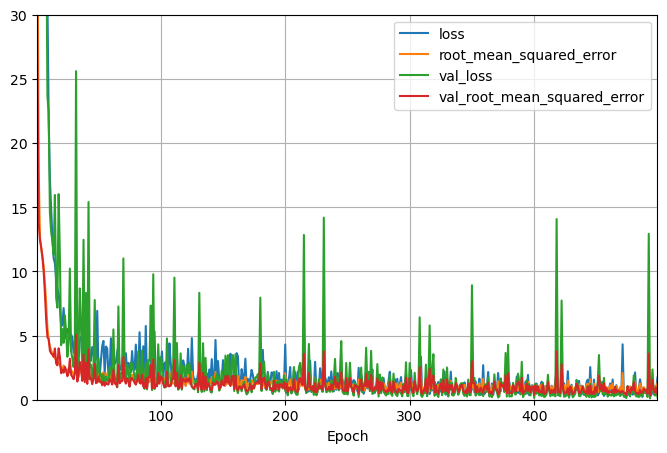

In [79]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[1, 499], ylim=[0, 30], grid=True, xlabel="Epoch")
plt.show()

In [80]:
predictions = model.predict(X_test)
results = pd.DataFrame(predictions)
results.columns = y.columns
results

51/51 [==============================] - 0s 726us/step


,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,CompInletMassFlow,CompInletTt,CompInletPt,CompInletPs,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt,TurbineExitPs
0,3.347689,4.199978,24.975170,449.840179,0.340538,0.116933,8.048845,280.578522,254.236771,87.345299,8.124606,535.652466,529.343445,627.613464,7.546460,733.723267,713.464722,165.951843
1,1.483385,2.169879,32.755550,248.193771,0.319611,-0.050998,6.079712,284.832611,274.351044,91.670624,6.098547,473.468781,467.248566,428.945557,5.636999,603.457825,589.424438,124.504776
2,0.508893,0.741606,50.823154,157.204254,0.240278,-0.059120,3.058597,267.443695,263.220581,66.041962,3.131452,399.040833,394.015747,206.156143,2.723263,556.138000,548.125305,76.220139
3,0.940753,1.307239,32.849464,239.063995,0.222223,-0.075892,3.822326,259.135254,249.449432,55.421280,3.927753,434.834747,429.157288,263.800964,3.567520,558.088989,544.806396,75.828758
4,0.149714,0.646269,119.415977,61.038754,0.251294,-0.184705,3.284809,290.525665,287.891541,98.948433,3.487692,395.557983,390.717957,227.664978,3.013807,556.157288,550.728821,99.729668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.918341,2.399336,27.364075,318.085510,0.228797,-0.038161,6.127737,277.733887,263.962738,81.668541,6.096224,482.545715,476.355347,443.414856,5.710481,624.360413,608.536316,123.011070
1599,0.185765,1.225843,93.126572,53.912479,0.246720,-0.044016,4.525676,289.980896,284.472717,88.883415,4.440504,430.431274,423.754333,276.552856,4.141810,481.426208,471.590912,85.851578
1600,1.514842,2.725728,31.103369,276.471832,0.263926,-0.029162,5.653569,275.779205,259.010620,69.541168,5.687582,492.172089,485.824585,408.277130,5.154644,619.483826,601.719971,106.889801
1601,1.356104,2.966080,34.848721,217.981247,0.326149,-0.069514,6.901252,292.784790,278.970581,95.255325,6.951679,499.628021,492.786530,486.395569,6.388811,598.572449,581.459045,127.899742


In [81]:
y_test

,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,CompInletMassFlow,CompInletTt,CompInletPt,CompInletPs,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt,TurbineExitPs
2088,3.59280,4.09200,25.104,450.140,0.090195,0.090195,7.9814,280.93,254.48,87.594,7.9814,535.38,529.14,628.11,8.0716,733.41,713.20,166.010
104,1.50850,2.14320,32.130,248.260,0.048469,0.048469,6.0765,284.75,274.24,92.021,6.0765,473.63,467.43,429.60,6.1250,603.92,589.77,124.690
8134,0.48667,0.76395,50.990,156.930,0.024816,0.024816,3.1013,267.14,262.98,66.291,3.1013,398.77,393.76,206.30,3.1261,555.73,547.73,76.219
6906,0.92738,1.33200,32.615,239.020,0.030247,0.030247,3.8799,259.15,249.53,55.907,3.8799,434.89,429.27,264.49,3.9101,558.43,545.04,76.006
4855,0.20696,0.68087,119.150,60.638,0.024660,0.024660,3.4131,290.17,287.59,99.054,3.4131,395.15,390.25,227.44,3.4378,554.86,549.37,99.802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,1.95490,2.38330,27.221,318.280,0.053214,0.053214,6.1422,277.65,263.97,82.094,6.1422,482.62,476.47,443.83,6.1954,624.58,608.80,123.300
1105,0.23142,1.22410,93.989,52.827,0.021751,0.021751,4.3807,289.61,284.02,88.418,4.3807,430.05,423.57,276.39,4.4025,479.96,470.10,85.700
5165,1.55850,2.72230,31.038,276.570,0.048374,0.048374,5.6351,275.82,259.22,69.914,5.6351,491.97,485.63,409.22,5.6834,619.41,601.74,107.000
7371,1.49050,2.94030,34.717,218.010,0.051745,0.051745,6.8370,292.69,278.98,95.614,6.8370,499.49,492.72,488.35,6.8887,598.23,581.07,128.350


# Results of Preliminary Model

In [82]:
# %%timeit
X_test1 = X_test.head(1)
y_test1 = y_test.head(1)
(X_test1*std)+mean

,Altitude,MachNumber,HPCSpoolSpeed
2088,1410.6,0.18679,0.9999


In [83]:
Predicted = pd.DataFrame(model.predict(X_test1))
Predicted.columns = y.columns
Predicted.round(decimals=4)

1/1 [==============================] - 0s 12ms/step


,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,CompInletMassFlow,CompInletTt,CompInletPt,CompInletPs,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt,TurbineExitPs
0,3.3477,4.2,24.975201,449.840088,0.3405,0.1169,8.0488,280.578491,254.236801,87.345299,8.1246,535.652405,529.343384,627.613403,7.5465,733.723206,713.464722,165.951904


In [86]:
original = pd.DataFrame(np.asarray(y_test.head(1)))
original.columns = y.columns
original.round(decimals=4)

,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,CompInletMassFlow,CompInletTt,CompInletPt,CompInletPs,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt,TurbineExitPs
0,3.5928,4.092,25.104,450.14,0.0902,0.0902,7.9814,280.93,254.48,87.594,7.9814,535.38,529.14,628.11,8.0716,733.41,713.2,166.01


In [85]:
(abs(Predicted - original)/original)

,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,CompInletMassFlow,CompInletTt,CompInletPt,CompInletPs,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt,TurbineExitPs
0,0.068222,0.026389,0.005132,0.000666,2.775617,0.29623,0.008449,0.001251,0.000956,0.002839,0.017942,0.000509,0.000384,0.000791,0.06506,0.000427,0.000371,0.00035


In [ ]:
k = 4
num_val_samples = len(X_train) // k
epochs = 500
all_scores = []

# Improving the model using Keras Functional API

In [7]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [20]:
normalization = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(256, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(256, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(18)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])
normalization.adapt(X_train)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 3)            7           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 256)          1024        ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 256)          65792       ['dense[0][0]']                  
                                                                                              

In [41]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [42]:
tf.random.set_seed(15)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=150, restore_best_weights=True)
checkpoints_cb = tf.keras.callbacks.ModelCheckpoint("perf_deck", save_weights_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=run_logdir, profile_batch=(100,200))

callbacks=[early_stopping_cb, checkpoints_cb, tensorboard_cb]

# history = model.fit(X_train, y_train, batch_size=16, epochs=2500, 
#                     validation_data=(X_vald, y_vald), callbacks=callbacks)

2023-05-05 14:53:20.060256: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-05-05 14:53:20.060280: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-05-05 14:53:20.063114: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


In [64]:
model.save("prel_model1")

INFO:tensorflow:Assets written to: prel_model1/assets


In [29]:
model = tf.keras.models.load_model("prel_model1")

In [37]:
keras.backend.set_value(model.optimizer.learning_rate, 0.0001)

In [43]:
history1 = model.fit(X_train, y_train, batch_size=16, epochs=2500, 
                    validation_data=(X_vald, y_vald), initial_epoch=2219, callbacks=callbacks)

Epoch 2220/2500
200/361 [===============>..............] - ETA: 0s - loss: 0.1124 - root_mean_squared_error: 0.3353

2023-05-05 14:53:26.649015: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-05-05 14:53:26.649048: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-05-05 14:53:26.824522: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-05-05 14:53:26.839516: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


361/361 [==============================] - 1s 2ms/step - loss: 0.1092 - root_mean_squared_error: 0.3305 - val_loss: 0.1275 - val_root_mean_squared_error: 0.3571
Epoch 2221/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1088 - root_mean_squared_error: 0.3299 - val_loss: 0.1369 - val_root_mean_squared_error: 0.3700
Epoch 2222/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1077 - root_mean_squared_error: 0.3281 - val_loss: 0.1335 - val_root_mean_squared_error: 0.3654
Epoch 2223/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1075 - root_mean_squared_error: 0.3279 - val_loss: 0.1369 - val_root_mean_squared_error: 0.3700
Epoch 2224/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1079 - root_mean_squared_error: 0.3285 - val_loss: 0.1292 - val_root_mean_squared_error: 0.3594
Epoch 2225/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1074 - root_mean_squared_error: 0.3277 - val_loss:

361/361 [==============================] - 1s 2ms/step - loss: 0.1041 - root_mean_squared_error: 0.3226 - val_loss: 0.1401 - val_root_mean_squared_error: 0.3742
Epoch 2313/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1045 - root_mean_squared_error: 0.3232 - val_loss: 0.1429 - val_root_mean_squared_error: 0.3780
Epoch 2314/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1043 - root_mean_squared_error: 0.3230 - val_loss: 0.1384 - val_root_mean_squared_error: 0.3720
Epoch 2315/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1037 - root_mean_squared_error: 0.3220 - val_loss: 0.1372 - val_root_mean_squared_error: 0.3704
Epoch 2316/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1038 - root_mean_squared_error: 0.3221 - val_loss: 0.1355 - val_root_mean_squared_error: 0.3681
Epoch 2317/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1042 - root_mean_squared_error: 0.3228 - val_loss:

In [44]:
model.save("final_model", save_format="tf")

INFO:tensorflow:Assets written to: final_model/assets


INFO:tensorflow:Assets written to: final_model/assets


In [57]:
pd.DataFrame(model.predict([0,0,1]),columns=y.columns)

1/1 [==============================] - 0s 66ms/step


,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,FuelFlowTotal,CompInletMassFlow,CompInletTt,CompInletTs,CompInletPt,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt
0,4.223017,4.418649,17.6667,495.844879,0.093335,0.115432,8.962152,288.142151,262.673004,100.970909,8.95474,542.803955,536.390991,702.569946,9.070863,736.499817,716.441223,186.055069


In [58]:
y.columns

Index(['NetThrust', 'GrossThrust', 'SFC', 'SpecificThrust', 'FuelFlow',
       'FuelFlowTotal', 'CompInletMassFlow', 'CompInletTt', 'CompInletTs',
       'CompInletPt', 'CompExitMassFlow', 'CompExitTt', 'CompExitTs',
       'CompExitPt', 'TurbExitMassFlow', 'TurbineExitTt', 'TurbineExitTs',
       'TurbineExitPt'],
      dtype='object')

In [30]:
predictions = model.predict(X_test)
results = pd.DataFrame(predictions)
results.columns = y.columns
results

51/51 [==============================] - 0s 862us/step


,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,CompInletMassFlow,CompInletTt,CompInletPt,CompInletPs,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt,TurbineExitPs
0,0.898016,1.478195,44.206783,168.809113,0.040008,0.039197,5.251081,291.979187,285.995636,104.750763,5.250989,446.598267,440.777802,361.252991,5.290437,587.929932,577.782837,122.851028
1,0.055670,1.209269,263.782776,17.356182,0.023431,0.022659,4.857147,304.937073,300.414154,115.557579,4.857272,430.485809,423.941742,305.955627,4.880076,485.438110,477.451752,105.578415
2,0.706315,1.833281,51.991985,119.711868,0.036661,0.035762,5.865453,297.806549,290.352539,107.916344,5.865368,461.532288,454.963867,393.862274,5.901936,544.058105,532.236389,118.704239
3,0.224498,0.777056,78.160545,82.743073,0.020035,0.019087,3.006496,267.102509,262.517944,61.876041,3.006497,396.318512,390.813171,188.842957,3.025859,489.874176,481.507202,63.697342
4,3.438224,3.567663,21.852339,458.725830,0.079861,0.078666,7.756917,281.492584,260.072144,90.024147,7.756636,519.692993,513.379028,592.400208,7.836176,691.163452,672.298279,157.901413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2.452124,2.690430,23.621889,433.116577,0.059221,0.057708,5.666911,262.050934,239.210205,61.089542,5.666786,497.183136,491.267273,427.988708,5.725246,673.892822,654.856567,112.342300
1599,1.982746,2.507797,27.045393,327.625977,0.054887,0.053636,6.021804,273.742432,257.669464,75.157539,6.021777,487.251526,481.092621,439.424744,6.075968,629.561340,612.649048,118.632904
1600,1.268290,1.813470,33.333080,232.718277,0.043093,0.042255,5.449094,281.378845,272.388153,86.805908,5.448966,459.855896,453.834015,379.974426,5.491664,590.129028,577.119507,113.893936
1601,1.403750,2.341063,34.389820,220.742966,0.048368,0.047392,6.315652,287.317627,275.894501,93.326508,6.315605,481.443115,474.999176,444.901886,6.363661,592.296814,577.210938,123.718391


In [62]:
tf.keras.models.load_model("final_model")

In [63]:
X_test1 = X_test.head(1)
y_test1 = y_test.head(1)


In [64]:
Predicted = pd.DataFrame(model.predict(X_test))
Predicted.columns = y.columns
Predicted

51/51 [==============================] - 0s 890us/step


,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,FuelFlowTotal,CompInletMassFlow,CompInletTt,CompInletTs,CompInletPt,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt
0,0.898576,1.486978,44.177605,168.755508,0.039271,0.039376,5.246330,292.068970,286.037842,104.767487,5.246489,446.665680,440.852386,361.397156,5.285254,587.969971,577.808655,122.974434
1,0.058863,1.211948,263.562592,17.289177,0.022925,0.023047,4.856246,304.972717,300.421600,115.614975,4.856424,430.548248,424.012299,306.012726,4.878666,485.414398,477.420319,105.669701
2,0.701859,1.844436,51.970387,119.605522,0.036311,0.036352,5.859693,297.860565,290.377899,107.925400,5.859813,461.571625,455.011627,394.002960,5.895513,543.987610,532.155273,118.807243
3,0.211713,0.787468,78.128738,82.672707,0.019191,0.019216,3.001783,267.167816,262.563965,61.865334,3.001933,396.367950,390.868835,188.954880,3.020601,489.843079,481.467651,63.769394
4,3.447287,3.571293,21.905384,458.586731,0.079432,0.079613,7.756758,281.600006,260.115906,90.098747,7.756657,519.750244,513.444946,592.680115,7.835632,691.137268,672.261597,158.058823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2.451510,2.695476,23.679972,432.997833,0.058271,0.058342,5.666148,262.163605,239.279053,61.204502,5.666217,497.227936,491.320435,428.240875,5.724022,673.926025,654.878418,112.468636
1599,1.986349,2.513372,27.062727,327.517609,0.054121,0.054097,6.021419,273.835938,257.710266,75.190880,6.021636,487.295380,481.144440,439.673157,6.075164,629.572876,612.649780,118.769073
1600,1.269092,1.818663,33.302883,232.642944,0.042516,0.042553,5.447256,281.472473,272.427948,86.827644,5.447385,459.918518,453.904114,380.168762,5.489367,590.152283,577.129883,114.017632
1601,1.408466,2.349133,34.383549,220.635834,0.047871,0.047899,6.312909,287.388184,275.915558,93.344093,6.313111,481.478119,475.042847,445.096954,6.360406,592.288086,577.190796,123.844910


In [65]:
original = pd.DataFrame(np.asarray(y_test))
original.columns = y.columns
original

,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,FuelFlowTotal,CompInletMassFlow,CompInletTt,CompInletTs,CompInletPt,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt
0,0.88688,1.47980,44.560,168.270,0.039519,0.039519,5.2707,292.03,286.13,104.610,5.2707,446.60,440.75,361.74,5.3102,587.70,577.63,122.930
1,0.08556,1.19860,267.510,17.561,0.022888,0.022888,4.8722,304.49,300.16,115.740,4.8722,430.54,424.01,306.71,4.8951,486.46,478.39,105.710
2,0.69714,1.82760,51.888,119.000,0.036173,0.036173,5.8585,297.85,290.52,107.680,5.8585,461.28,454.71,393.14,5.8947,543.71,532.01,118.610
3,0.24720,0.76292,77.057,82.629,0.019048,0.019048,2.9916,267.07,262.54,61.472,2.9916,396.27,390.74,188.81,3.0107,489.94,481.41,63.753
4,3.57000,3.57110,22.230,458.890,0.079362,0.079362,7.7795,282.03,260.52,90.518,7.7795,520.10,513.85,594.68,7.8589,692.10,672.97,158.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2.45260,2.70480,23.820,432.970,0.058419,0.058419,5.6645,261.98,238.88,61.021,5.6645,497.02,491.07,427.77,5.7229,673.64,654.62,112.740
1599,1.97880,2.50860,27.097,327.690,0.053619,0.053619,6.0387,273.72,257.75,75.447,6.0387,487.25,481.08,439.95,6.0923,629.43,612.53,118.570
1600,1.27080,1.81300,33.426,232.700,0.042479,0.042479,5.4613,281.42,272.31,86.761,5.4613,459.90,453.87,380.32,5.5038,590.40,577.36,114.030
1601,1.39580,2.36550,34.379,220.930,0.047984,0.047984,6.3177,287.56,276.07,93.140,6.3177,481.58,475.13,445.56,6.3657,592.66,577.44,123.760


In [66]:
error = pd.DataFrame(abs(Predicted - original)/original)*100

In [68]:
error

,NetThrust,GrossThrust,SFC,SpecificThrust,FuelFlow,FuelFlowTotal,CompInletMassFlow,CompInletTt,CompInletTs,CompInletPt,CompExitMassFlow,CompExitTt,CompExitTs,CompExitPt,TurbExitMassFlow,TurbineExitTt,TurbineExitTs,TurbineExitPt
0,1.318837,0.485093,0.858158,0.288529,0.627733,0.362309,0.462372,0.013344,0.032209,0.150546,0.459350,0.014707,0.023230,0.094776,0.469784,0.045937,0.030929,0.036146
1,31.202235,1.113656,1.475612,1.547879,0.161782,0.693467,0.327440,0.158533,0.087154,0.108022,0.323789,0.001916,0.000542,0.227340,0.335715,0.214941,0.202697,0.038123
2,0.676951,0.921211,0.158778,0.508842,0.382717,0.496052,0.020356,0.003547,0.048913,0.227897,0.022407,0.063221,0.066334,0.219505,0.013785,0.051058,0.027307,0.166296
3,14.355480,3.217679,1.390838,0.052895,0.752684,0.881753,0.340375,0.036626,0.009128,0.639858,0.345404,0.024718,0.032972,0.076733,0.328869,0.019782,0.011976,0.025715
4,3.437343,0.005401,1.460261,0.066088,0.088236,0.315756,0.292336,0.152464,0.155111,0.463171,0.293629,0.067248,0.078827,0.336296,0.296074,0.139103,0.105265,0.177578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,0.044445,0.344727,0.587860,0.006428,0.253128,0.131324,0.029088,0.070083,0.167052,0.300720,0.030309,0.041837,0.050998,0.110077,0.019604,0.042460,0.039476,0.240699
1599,0.381511,0.190242,0.126483,0.052608,0.935379,0.891434,0.286170,0.042356,0.015416,0.339470,0.282569,0.009313,0.013395,0.062926,0.281268,0.022699,0.019555,0.167895
1600,0.134435,0.312382,0.368327,0.024519,0.086980,0.173967,0.257153,0.018646,0.043314,0.076814,0.254796,0.004027,0.007516,0.039766,0.262228,0.041958,0.039857,0.010847
1601,0.907452,0.691924,0.013231,0.133149,0.235982,0.177305,0.075833,0.059750,0.055943,0.219125,0.072632,0.021156,0.018343,0.103924,0.083166,0.062753,0.043157,0.068608


# Training with fresh data

In [8]:
data2 = pd.read_csv('data_2.csv')
data2

,alt,XM,ZXN_HPC,FN,SFC,St8_Ts,St2_T,St3_T,St2_P,St3_P,WF,St8_T
0,0.00000,0.000000,0.60000,0.560520,53.580,633.27,288.15,387.93,101.330,220.66,0.030032,648.78
1,3000.00000,0.350000,0.80000,1.034800,35.029,519.16,275.24,449.11,76.309,331.42,0.036247,569.97
2,4500.00000,0.175000,0.70000,0.573150,42.851,530.37,260.49,395.92,58.976,194.63,0.024560,560.39
3,1500.00000,0.525000,0.90000,1.892900,32.481,539.65,293.77,507.87,102.030,546.25,0.061483,624.85
4,2250.00000,0.262500,0.85000,1.640100,29.230,544.57,277.30,473.50,80.841,411.05,0.047940,608.86
...,...,...,...,...,...,...,...,...,...,...,...,...
8187,2250.70000,0.635830,0.65063,-0.008334,-299.000,454.43,295.67,400.71,101.160,230.78,0.018340,475.41
8188,1500.70000,0.198330,0.70063,0.671970,46.791,564.83,280.59,413.93,86.900,260.87,0.031442,592.36
8189,4500.70000,0.548330,0.90063,1.583000,30.599,517.89,274.49,488.70,70.817,412.18,0.048438,614.82
8190,3000.70000,0.023328,0.60063,0.422630,55.997,591.05,268.67,369.45,70.129,162.61,0.023666,607.64


In [9]:
print((data2[data2["FN"]<0]).shape)
data3 = data2[data2["FN"]<0]
# data1
# data3[(data3["FNqW2"]<0)]
removal = list(data3.index)
len(removal)
data3

(180, 12)


,alt,XM,ZXN_HPC,FN,SFC,St8_Ts,St2_T,St3_T,St2_P,St3_P,WF,St8_T
51,1968.80,0.68906,0.61875,-0.154230,-96.596,431.01,301.54,392.74,109.630,219.52,0.014898,447.90
105,4359.40,0.66172,0.63438,-0.028045,-299.000,428.07,282.61,382.48,78.901,178.43,0.014713,448.21
135,820.31,0.66992,0.66719,-0.049703,-299.000,459.01,308.20,417.43,124.090,283.39,0.020647,481.31
177,3539.10,0.63711,0.61094,-0.059808,-248.960,437.62,286.71,378.40,85.997,179.10,0.014890,454.62
235,2835.90,0.63164,0.64531,-0.002940,-299.000,450.69,291.27,394.96,93.656,213.71,0.017456,471.37
...,...,...,...,...,...,...,...,...,...,...,...,...
8057,3821.00,0.69325,0.66782,-0.005902,-299.000,427.82,288.67,399.63,86.998,212.86,0.016016,452.01
8087,1360.10,0.68505,0.63501,-0.136570,-122.930,441.60,305.54,402.49,117.750,244.83,0.016788,460.08
8115,2016.40,0.60848,0.60376,-0.068711,-243.970,459.21,295.44,384.75,101.870,203.36,0.016764,475.06
8141,4969.50,0.66864,0.61938,-0.047317,-287.200,418.77,278.77,373.49,73.206,159.88,0.013589,437.44


In [10]:
gtdata = data2.drop(removal)

In [11]:
gtdata

,alt,XM,ZXN_HPC,FN,SFC,St8_Ts,St2_T,St3_T,St2_P,St3_P,WF,St8_T
0,0.00000,0.000000,0.60000,0.56052,53.580,633.27,288.15,387.93,101.330,220.66,0.030032,648.78
1,3000.00000,0.350000,0.80000,1.03480,35.029,519.16,275.24,449.11,76.309,331.42,0.036247,569.97
2,4500.00000,0.175000,0.70000,0.57315,42.851,530.37,260.49,395.92,58.976,194.63,0.024560,560.39
3,1500.00000,0.525000,0.90000,1.89290,32.481,539.65,293.77,507.87,102.030,546.25,0.061483,624.85
4,2250.00000,0.262500,0.85000,1.64010,29.230,544.57,277.30,473.50,80.841,411.05,0.047940,608.86
...,...,...,...,...,...,...,...,...,...,...,...,...
8186,5250.70000,0.285830,0.85063,1.30270,28.147,516.10,258.18,454.37,55.284,307.29,0.036666,587.06
8188,1500.70000,0.198330,0.70063,0.67197,46.791,564.83,280.59,413.93,86.900,260.87,0.031442,592.36
8189,4500.70000,0.548330,0.90063,1.58300,30.599,517.89,274.49,488.70,70.817,412.18,0.048438,614.82
8190,3000.70000,0.023328,0.60063,0.42263,55.997,591.05,268.67,369.45,70.129,162.61,0.023666,607.64


In [12]:
X_gt = gtdata[["alt", "XM", "ZXN_HPC"]]
y_gt = gtdata.drop(["alt", "XM", "ZXN_HPC"], axis = 1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xgt_train, xgt_test, ygt_train, ygt_test = train_test_split(X_gt, y_gt, test_size=0.2)

In [16]:
print(xgt_train.shape, xgt_test.shape, ygt_train.shape, ygt_test.shape)

(6409, 3) (1603, 3) (6409, 9) (1603, 9)


In [ ]:
normalization = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(256, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(256, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(9)

input_ = tf.keras.layers.Input(shape=xgt_train.shape[1:])
normalized = normalization(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])
normalization.adapt(xgt_train)

In [20]:
class WideandDeepModel(tf.keras.Model):
    def __init__(self, units=256, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
#         self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.outputs = tf.keras.layers.Dense(9)
        
    def call(self, inputs):
        input_ = inputs
        norm_wide = self.norm_layer_wide(input_)
        hidden1 = self.hidden1(norm_wide)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        outputs = self.outputs(concat)
        return outputs

In [21]:
model = WideandDeepModel(256, activation="relu", name="model1")

In [24]:
model.call(xgt_train)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.norm_layer_wide.adapt(xgt_train)

In [53]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="logs/model_2"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

PosixPath('logs/model_2/run_2023_05_05_21_37_51')

In [57]:
tf.random.set_seed(20)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)
models_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("perf_deck_2", save_weights_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100,200))
callbacks = [early_stopping_cb, models_checkpoint_cb, tensorboard_cb]
model.fit(xgt_train, ygt_train, epochs=2500, batch_size=16, validation_split=0.1, callbacks=callbacks)

2023-05-05 21:43:24.865936: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-05-05 21:43:24.865979: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-05-05 21:43:25.058043: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2023-05-05 21:43:25.058988: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1813] CUPTI activity buffer flushed


Epoch 1/2500
100/361 [=======>......................] - ETA: 0s - loss: 0.4502 - root_mean_squared_error: 0.6709

2023-05-05 21:43:25.369685: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-05-05 21:43:25.369715: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


229/361 [==================>...........] - ETA: 0s - loss: 0.4647 - root_mean_squared_error: 0.6817

2023-05-05 21:43:25.801597: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-05-05 21:43:25.803709: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1813] CUPTI activity buffer flushed
2023-05-05 21:43:25.851857: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuTracer has collected 8481 callback api events and 8218 activity events. 
2023-05-05 21:43:25.889597: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


361/361 [==============================] - 1s 3ms/step - loss: 0.4968 - root_mean_squared_error: 0.7048 - val_loss: 0.4579 - val_root_mean_squared_error: 0.6767
Epoch 2/2500
361/361 [==============================] - 1s 3ms/step - loss: 0.4810 - root_mean_squared_error: 0.6935 - val_loss: 0.5976 - val_root_mean_squared_error: 0.7731
Epoch 3/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4851 - root_mean_squared_error: 0.6965 - val_loss: 0.5132 - val_root_mean_squared_error: 0.7164
Epoch 4/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4768 - root_mean_squared_error: 0.6905 - val_loss: 0.4763 - val_root_mean_squared_error: 0.6902
Epoch 5/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4816 - root_mean_squared_error: 0.6940 - val_loss: 0.4430 - val_root_mean_squared_error: 0.6656
Epoch 6/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4728 - root_mean_squared_error: 0.6876 - val_loss: 0.4775 - val_r

Epoch 48/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4425 - root_mean_squared_error: 0.6652 - val_loss: 0.4118 - val_root_mean_squared_error: 0.6417
Epoch 49/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4536 - root_mean_squared_error: 0.6735 - val_loss: 0.4229 - val_root_mean_squared_error: 0.6503
Epoch 50/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4520 - root_mean_squared_error: 0.6723 - val_loss: 0.4287 - val_root_mean_squared_error: 0.6547
Epoch 51/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4582 - root_mean_squared_error: 0.6769 - val_loss: 0.4274 - val_root_mean_squared_error: 0.6538
Epoch 52/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4487 - root_mean_squared_error: 0.6698 - val_loss: 0.4068 - val_root_mean_squared_error: 0.6378
Epoch 53/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4465 - root_mean_squared_error: 0.6682 - val_l

Epoch 95/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4127 - root_mean_squared_error: 0.6424 - val_loss: 0.3957 - val_root_mean_squared_error: 0.6290
Epoch 96/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4129 - root_mean_squared_error: 0.6426 - val_loss: 0.4129 - val_root_mean_squared_error: 0.6426
Epoch 97/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4053 - root_mean_squared_error: 0.6366 - val_loss: 0.4046 - val_root_mean_squared_error: 0.6361
Epoch 98/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4164 - root_mean_squared_error: 0.6453 - val_loss: 0.4145 - val_root_mean_squared_error: 0.6438
Epoch 99/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4121 - root_mean_squared_error: 0.6419 - val_loss: 0.4027 - val_root_mean_squared_error: 0.6346
Epoch 100/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.4177 - root_mean_squared_error: 0.6463 - val_

361/361 [==============================] - 1s 2ms/step - loss: 0.3684 - root_mean_squared_error: 0.6070 - val_loss: 0.3517 - val_root_mean_squared_error: 0.5931
Epoch 188/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3671 - root_mean_squared_error: 0.6059 - val_loss: 0.4008 - val_root_mean_squared_error: 0.6331
Epoch 189/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3699 - root_mean_squared_error: 0.6082 - val_loss: 0.3558 - val_root_mean_squared_error: 0.5965
Epoch 190/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3713 - root_mean_squared_error: 0.6093 - val_loss: 0.3769 - val_root_mean_squared_error: 0.6139
Epoch 191/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3702 - root_mean_squared_error: 0.6085 - val_loss: 0.3611 - val_root_mean_squared_error: 0.6009
Epoch 192/2500
361/361 [==============================] - 1s 3ms/step - loss: 0.3620 - root_mean_squared_error: 0.6016 - val_loss: 0.34

361/361 [==============================] - 1s 2ms/step - loss: 0.3213 - root_mean_squared_error: 0.5668 - val_loss: 0.3147 - val_root_mean_squared_error: 0.5610
Epoch 280/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3285 - root_mean_squared_error: 0.5731 - val_loss: 0.3131 - val_root_mean_squared_error: 0.5596
Epoch 281/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3194 - root_mean_squared_error: 0.5651 - val_loss: 0.3173 - val_root_mean_squared_error: 0.5633
Epoch 282/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3326 - root_mean_squared_error: 0.5767 - val_loss: 0.3144 - val_root_mean_squared_error: 0.5607
Epoch 283/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3229 - root_mean_squared_error: 0.5683 - val_loss: 0.3048 - val_root_mean_squared_error: 0.5521
Epoch 284/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.3260 - root_mean_squared_error: 0.5709 - val_loss: 0.31

361/361 [==============================] - 1s 2ms/step - loss: 0.2889 - root_mean_squared_error: 0.5375 - val_loss: 0.2765 - val_root_mean_squared_error: 0.5258
Epoch 372/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2936 - root_mean_squared_error: 0.5419 - val_loss: 0.2706 - val_root_mean_squared_error: 0.5202
Epoch 373/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2964 - root_mean_squared_error: 0.5445 - val_loss: 0.3006 - val_root_mean_squared_error: 0.5482
Epoch 374/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2888 - root_mean_squared_error: 0.5374 - val_loss: 0.2886 - val_root_mean_squared_error: 0.5372
Epoch 375/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2871 - root_mean_squared_error: 0.5359 - val_loss: 0.3030 - val_root_mean_squared_error: 0.5504
Epoch 376/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2849 - root_mean_squared_error: 0.5338 - val_loss: 0.30

361/361 [==============================] - 1s 2ms/step - loss: 0.2622 - root_mean_squared_error: 0.5121 - val_loss: 0.2824 - val_root_mean_squared_error: 0.5314
Epoch 464/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2826 - root_mean_squared_error: 0.5316 - val_loss: 0.2872 - val_root_mean_squared_error: 0.5359
Epoch 465/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2619 - root_mean_squared_error: 0.5118 - val_loss: 0.2583 - val_root_mean_squared_error: 0.5083
Epoch 466/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2607 - root_mean_squared_error: 0.5106 - val_loss: 0.2958 - val_root_mean_squared_error: 0.5438
Epoch 467/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2637 - root_mean_squared_error: 0.5135 - val_loss: 0.3252 - val_root_mean_squared_error: 0.5703
Epoch 468/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2615 - root_mean_squared_error: 0.5114 - val_loss: 0.27

361/361 [==============================] - 1s 2ms/step - loss: 0.2436 - root_mean_squared_error: 0.4936 - val_loss: 0.2734 - val_root_mean_squared_error: 0.5229
Epoch 556/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2395 - root_mean_squared_error: 0.4894 - val_loss: 0.2643 - val_root_mean_squared_error: 0.5141
Epoch 557/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2363 - root_mean_squared_error: 0.4861 - val_loss: 0.2650 - val_root_mean_squared_error: 0.5148
Epoch 558/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2393 - root_mean_squared_error: 0.4892 - val_loss: 0.2463 - val_root_mean_squared_error: 0.4963
Epoch 559/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2390 - root_mean_squared_error: 0.4889 - val_loss: 0.2489 - val_root_mean_squared_error: 0.4989
Epoch 560/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.2322 - root_mean_squared_error: 0.4819 - val_loss: 0.24

KeyboardInterrupt: 

In [60]:
tf.keras.backend.set_value(model.optimizer.learning_rate, 1e-4)
model.fit(xgt_train, ygt_train, epochs=2500, initial_epoch=731, batch_size=16, validation_split=0.1, callbacks=callbacks)

Epoch 732/2500
100/361 [=======>......................] - ETA: 0s - loss: 0.1275 - root_mean_squared_error: 0.3571

2023-05-05 21:57:30.316314: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-05-05 21:57:30.316353: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


219/361 [=================>............] - ETA: 0s - loss: 0.1465 - root_mean_squared_error: 0.3827

2023-05-05 21:57:30.729523: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-05-05 21:57:30.731113: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_tracer.cc:1813] CUPTI activity buffer flushed
2023-05-05 21:57:30.781234: I tensorflow/compiler/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuTracer has collected 8481 callback api events and 8218 activity events. 
2023-05-05 21:57:30.819071: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


361/361 [==============================] - 1s 3ms/step - loss: 0.1624 - root_mean_squared_error: 0.4030 - val_loss: 0.1626 - val_root_mean_squared_error: 0.4032
Epoch 733/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1582 - root_mean_squared_error: 0.3977 - val_loss: 0.1643 - val_root_mean_squared_error: 0.4054
Epoch 734/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1535 - root_mean_squared_error: 0.3918 - val_loss: 0.1689 - val_root_mean_squared_error: 0.4109
Epoch 735/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1485 - root_mean_squared_error: 0.3854 - val_loss: 0.1754 - val_root_mean_squared_error: 0.4188
Epoch 736/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1488 - root_mean_squared_error: 0.3857 - val_loss: 0.1840 - val_root_mean_squared_error: 0.4290
Epoch 737/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1543 - root_mean_squared_error: 0.3928 - val_loss: 0.16

361/361 [==============================] - 1s 2ms/step - loss: 0.1396 - root_mean_squared_error: 0.3737 - val_loss: 0.1581 - val_root_mean_squared_error: 0.3977
Epoch 825/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1346 - root_mean_squared_error: 0.3669 - val_loss: 0.1571 - val_root_mean_squared_error: 0.3964
Epoch 826/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1310 - root_mean_squared_error: 0.3620 - val_loss: 0.1590 - val_root_mean_squared_error: 0.3987
Epoch 827/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1343 - root_mean_squared_error: 0.3665 - val_loss: 0.1529 - val_root_mean_squared_error: 0.3910
Epoch 828/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1376 - root_mean_squared_error: 0.3710 - val_loss: 0.1724 - val_root_mean_squared_error: 0.4152
Epoch 829/2500
361/361 [==============================] - 1s 2ms/step - loss: 0.1375 - root_mean_squared_error: 0.3708 - val_loss: 0.15

In [64]:
pd.DataFrame(model.predict(xgt_test), columns=ygt_test.columns).round(4)

51/51 [==============================] - 0s 673us/step


,FN,SFC,St8_Ts,St2_T,St3_T,St2_P,St3_P,WF,St8_T
0,1.0654,34.166599,483.714386,274.226990,469.730804,68.871101,350.339294,0.0385,564.895203
1,0.2380,99.213203,500.195709,280.952606,396.953400,82.006897,214.188400,0.0292,523.624084
2,0.4132,69.496597,507.807312,289.903198,424.562592,96.265503,285.822205,0.0191,537.970520
3,0.9410,36.117599,555.533203,276.014496,425.026001,80.130997,281.820587,0.0383,589.981995
4,2.2038,30.069901,565.227600,283.486389,516.506104,81.980003,518.057678,0.0699,669.646301
...,...,...,...,...,...,...,...,...,...
1598,0.7565,48.485298,551.013611,290.438385,436.391388,102.238403,331.345093,0.0377,583.944214
1599,0.6392,37.896801,489.812195,257.844604,417.397003,53.964199,224.408997,0.0337,535.327026
1600,0.4697,66.074699,514.001587,297.601501,440.095795,110.122498,338.249390,0.0302,547.526794
1601,0.4651,70.466797,504.250885,304.631714,453.223206,121.775002,384.575989,0.0310,541.249390


In [65]:
ygt_test.round(4)

,FN,SFC,St8_Ts,St2_T,St3_T,St2_P,St3_P,WF,St8_T
5037,1.0701,34.413,483.84,274.55,469.87,68.664,350.11,0.0368,564.58
299,0.2249,98.700,500.51,280.88,396.78,82.120,213.33,0.0222,523.77
5347,0.4054,69.362,507.57,289.67,424.31,96.257,285.98,0.0281,537.67
4172,0.9374,35.843,555.98,275.92,425.00,80.220,281.12,0.0336,590.34
593,2.2040,29.976,565.84,283.50,516.64,82.029,517.46,0.0661,670.23
...,...,...,...,...,...,...,...,...,...
1456,0.7538,48.338,550.92,290.69,436.71,102.270,331.16,0.0364,583.93
885,0.6581,38.339,489.55,257.82,417.27,53.906,224.79,0.0252,535.06
6919,0.4898,66.224,513.79,297.40,439.81,109.660,338.19,0.0324,547.06
863,0.4932,70.015,504.88,304.63,453.36,121.360,383.86,0.0345,541.78


In [69]:
pd.DataFrame(model.predict([0,0,1]), columns=ygt_test.columns)

1/1 [==============================] - 0s 30ms/step


,FN,SFC,St8_Ts,St2_T,St3_T,St2_P,St3_P,WF,St8_T
0,4.24846,22.321487,625.213562,288.616699,542.84436,101.414688,704.999329,0.123605,734.383484


In [73]:
model.save("final_model_2", save_format="tf")

INFO:tensorflow:Assets written to: final_model_2/assets


In [71]:
test_rmse, test_mae = model.evaluate(xgt_test, ygt_test)

51/51 [==============================] - 0s 1ms/step - loss: 0.1360 - root_mean_squared_error: 0.3688
